In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 41s 0us/step


In [5]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

y_train = to_categorical(y_train.flatten(), num_classes=10)
y_test = to_categorical(y_test.flatten(), num_classes=10)


In [9]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(x_train, y_train, epochs=15, validation_split=.1)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2700 - loss: 2.0419 - val_accuracy: 0.3572 - val_loss: 1.8270
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3606 - loss: 1.7831 - val_accuracy: 0.3728 - val_loss: 1.7605
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3815 - loss: 1.7325 - val_accuracy: 0.3890 - val_loss: 1.7178
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3889 - loss: 1.7011 - val_accuracy: 0.3828 - val_loss: 1.7102
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4043 - loss: 1.6728 - val_accuracy: 0.3954 - val_loss: 1.6903
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4076 - loss: 1.6577 - val_accuracy: 0.3996 - val_loss: 1.6779
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4098 - loss: 1.6495 - val_accuracy: 0.4048 - val_loss: 1.6682
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4113 - loss: 1.6418 - 

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"loss: {test_loss}")
print(f"acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.4335 - loss: 1.5986
loss: 1.604522705078125
acc: 0.42660000920295715


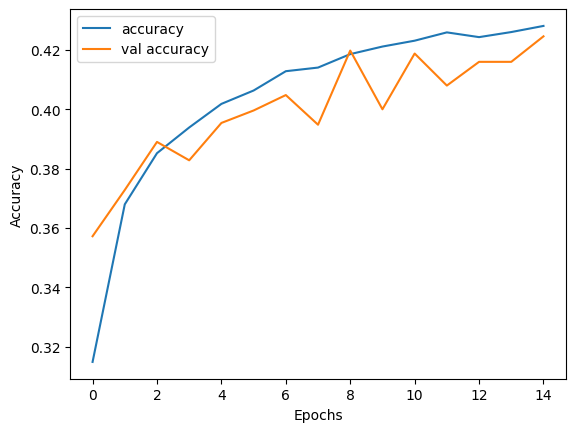

In [13]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

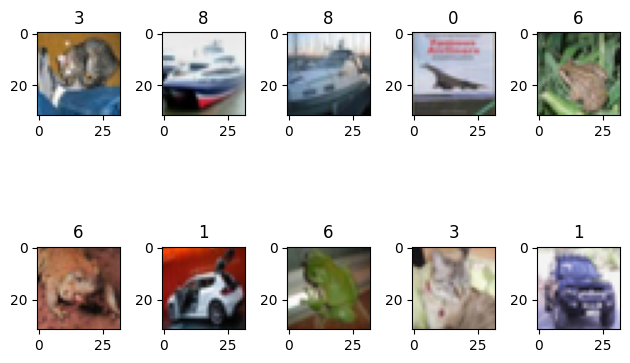

In [30]:
import numpy as np 

(display_trainx, _), (display_testy, __) = tf.keras.datasets.cifar10.load_data()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(display_testy[i])
    plt.title(np.argmax(y_test[i]))
plt.tight_layout()
plt.show()

In [24]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
              precision    recall  f1-score   support

           0       0.48      0.43      0.45      1000
           1       0.51      0.56      0.53      1000
           2       0.28      0.21      0.24      1000
           3       0.31      0.22      0.26      1000
           4       0.36      0.43      0.39      1000
           5       0.37      0.36      0.37      1000
           6       0.47      0.44      0.45      1000
           7       0.49      0.53      0.51      1000
           8       0.42      0.68      0.52      1000
           9       0.52      0.42      0.46      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000

